In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from scipy.io import loadmat
%matplotlib inline

In [33]:
raw_data = loadmat('C:/Users/nipun/Documents/Jupyter/Machine Learning Exercises/data/ex6data1.mat')

data = pd.DataFrame(raw_data['X'], columns = ['X1', 'X2'])
data['y'] = raw_data['y']

In [34]:
positive = data[data['y'].isin([1])]
negative = data[data['y'].isin([0])]

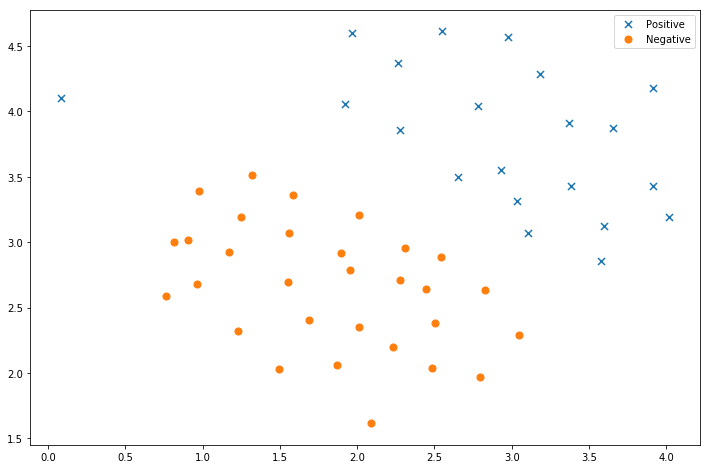

In [35]:
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(positive['X1'], positive['X2'], s = 50, marker = 'x', label = 'Positive')
ax.scatter(negative['X1'], negative['X2'], s = 50, marker = 'o', label = 'Negative')
ax.legend()

In [36]:
from sklearn import svm

svc = svm.LinearSVC(C = 1, loss = 'hinge', max_iter = 1000)
svc

LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.0001, verbose=0)

In [37]:
svc.fit(data[['X1', 'X2']], data['y'])
svc.score(data[['X1', 'X2']], data['y'])

0.9803921568627451

In [38]:
svc2 = svm.LinearSVC(C = 100, loss = 'hinge', max_iter = 1000)  
svc2.fit(data[['X1', 'X2']], data['y'])  
svc2.score(data[['X1', 'X2']], data['y'])  

0.9411764705882353

Text(0.5,1,'SVM (C=1) Decision Confidence')

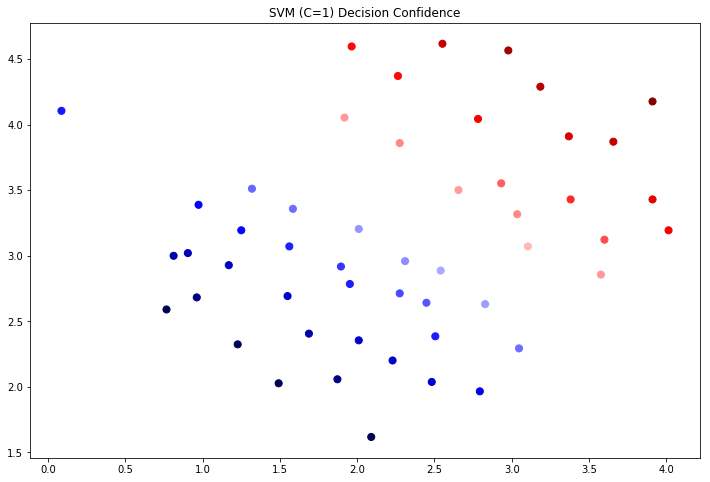

In [39]:
data['SVM  1 Confidence'] = svc.decision_function(data[['X1', 'X2']])

fig, ax = plt.subplots(figsize = (12,8))
ax.scatter(data['X1'], data['X2'], s = 50, c = data['SVM  1 Confidence'], cmap = 'seismic')
ax.set_title('SVM (C=1) Decision Confidence')

Text(0.5,1,'SVM (C=100) Decision Confidence')

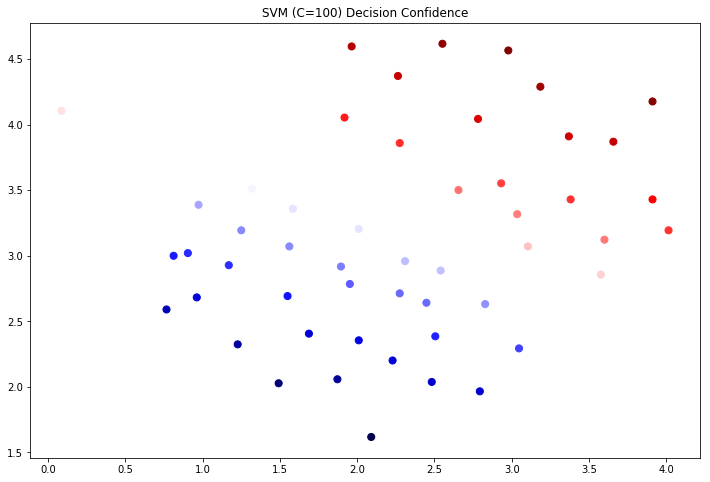

In [40]:
data['SVM 2 Confidence'] = svc2.decision_function(data[['X1', 'X2']])

fig, ax = plt.subplots(figsize=(12,8))  
ax.scatter(data['X1'], data['X2'], s=50, c=data['SVM 2 Confidence'], cmap='seismic')  
ax.set_title('SVM (C=100) Decision Confidence')  

In [41]:
def gaussian_kernel(x1, x2, sigma):
    return np.exp(-(np.sum((x1-x2) **2) / (2* (sigma **2))))

In [45]:
x1 = np.array([1.0, 2.0, 1.0])
x2 = np.array([0.0, 4.0, -1.0])
sigma = 2

gaussian_kernel(x1, x2, sigma)

0.32465246735834974